# 📚 Final Project — Introduction to Deep Learning
## Image Classification with Convolutional Neural Networks (CNNs)

---

### 🔍 Overview
Design, train, and analyze **convolutional neural networks (CNNs)** for an image classification problem of your choice (the same one selected in Exercise 1). You previously built a dataset (~1,000 images) and trained a classifier using **fastai**. In this project, you will implement and train your own network in **PyTorch** (without fastai).

> **Focus is not only on accuracy.** Emphasize architectural choices, optimization strategies, hyperparameter tuning, overfitting vs generalization, and explaining *why* things worked or didn’t.

---

### 🎯 Learning Goals
- Design and train CNN architectures for image classification  
- Experiment with optimization algorithms and hyperparameters  
- Apply batch normalization and regularization techniques  
- Use transfer learning effectively  
- Work with pretrained networks (e.g., ResNet50)  
- Analyze and communicate experimental results clearly  

---

### 🧭 Project Structure (Summary)
- **Part 1 — Training a CNN from Scratch**  
  Build models, compare architectures/optimizers/hyperparameters; add batch norm & regularization; analyze overfitting vs generalization.
- **Part 2 — Transfer Learning**  
  Pretrain on an external dataset (e.g., CIFAR-10), then fine-tune on your dataset; compare with training from scratch.
- **Part 3 — Transfer learning with a Pretrained Network (ResNet50)**  
  Adapt ResNet50, replace the final layer, experiment with freezing/unfreezing and fine-tuning.

---

### 📦 Deliverables
- **Code:** All notebooks & scripts, clear structure/documentation, hosted in your **GitHub repo** from Exercise 1.  
- **Presentation (PPT):** Problem & dataset, experiments & results, comparisons & conclusions, final reflection.

---

### 🧪 Evaluation Criteria
- Experimental rigor  
- Quality of analysis  
- Clarity of explanations  
- Thoughtfulness of conclusions  
- Code organization & reproducibility  

*Accuracy alone is **not** the main criterion.*

---

### 📜 Academic Integrity
You may use external resources for reference, but:
- All work must be your own  
- You must understand and explain every line of code you submit  

---

## 📎 Appendix — Detailed Instructions (Click to expand)

<details>
  <summary><strong>Part 1 — Training a CNN from Scratch</strong></summary>

  ### Step 1 — Architecture & Optimization
  1. Choose <strong>at least two different CNN architectures</strong> (e.g., shallow vs deeper CNN).
  2. Compare <strong>optimization algorithms</strong> such as Adam and SGD with momentum.
  3. Tune key hyperparameters: <em>learning rate, batch size, number of epochs</em>.

  **Document every experiment clearly.** Explain:  
  - Why you chose each architecture  
  - How hyperparameters affected training  
  - What worked vs what didn’t  

  ### Step 2 — Add Batch Normalization
  Modify your best-performing architecture by adding <strong>Batch Normalization</strong> layers. Analyze:  
  - Training stability  
  - Convergence speed  
  - Validation performance  

  *Compare results with and without batch normalization.*

  ### Step 3 — Add Regularization
  Add <strong>regularization techniques</strong>:
  - Dropout  
  - Weight decay (L2 regularization)  
  - Data augmentation  

  Analyze:
  - Overfitting vs generalization  
  - Training vs validation curves  

  *Explain which regularization methods helped and why.*

  > Note: Depending on your dataset size and problem complexity, accuracy in Part 1 may be limited—you may need more data.
</details>

<details>
  <summary><strong>Part 2 — Transfer Learning</strong></summary>

  ### Step 4 — Pretraining on an External Dataset
  1. Choose an external image dataset (e.g., CIFAR-10 or another public dataset).  
  2. Train your CNN architecture on this dataset (or a subset if it’s too large).  
  3. Adjust your architecture as needed.  
  4. Save the trained weights.  

  *Explain why this dataset is relevant and what features it may teach the model.*

  ### Step 5 — Fine-Tuning on Your Dataset
  1. Load the pretrained weights.  
  2. Fine-tune the network using your dataset.  
  3. Compare results with training from scratch.  

  Analyze:
  - Speed of convergence  
  - Final accuracy  
  - Generalization  

  **Notes:**
  1. You may need to adjust image sizes/shapes to match your network’s expected input.  
  2. Adjust the final classification layer to the number of classes in the target dataset.
</details>

<details>
  <summary><strong>Part 3 — Transfer learning with a Pretrained Network (ResNet50)</strong></summary>

  ### Step 6 — Adapting a Pretrained Model
  1. Load <strong>ResNet50 pretrained on ImageNet</strong>.  
  2. Replace the final classification layer to match your number of classes.  
  3. Freeze and unfreeze layers as needed.  

  *Explain your design choices.*

  ### Step 7 — Training & Fine-Tuning
  1. Fine-tune the modified ResNet50 on your dataset.  
  2. Experiment with: freezing vs unfreezing layers, learning rates, and data augmentation.  

  Compare:
  - Performance vs your custom CNN  
  - Training time  
  - Stability  
</details>

<details>
  <summary><strong>Results & Analysis</strong></summary>

  Include:
  - Training & validation curves  
  - Quantitative metrics (accuracy, loss)  
  - Qualitative observations  
  - Short conclusions  

  **Focus on reasoning, not just numbers.**
</details>

<details>
  <summary><strong>Final Reflection</strong></summary>

  Reflect on:
  - What architectural choices mattered most?  
  - Which optimization strategies worked best?  
  - When did transfer learning help?  
  - What would you do differently with more time or data?  
</details>

<details>
  <summary><strong>What to Submit</strong></summary>

  - <strong>Code:</strong> All notebooks & scripts, clear structure & documentation, hosted in your <strong>GitHub repo</strong> from Exercise 1.  
  - <strong>Presentation (PPT):</strong> Problem & dataset, each experiment, results & comparisons, considerations & conclusions, final reflection.  

  *Explain your reasoning after every experiment.*
</details>

# Libraries

In [1]:
import torch.nn as nn
from torchvision import datasets ,models
import torch
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, random_split
import os
import torch.optim as optim
from pathlib import Path
from PIL import Image, ImageFile
import numpy as np
import random


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading the data

In [3]:
!pip install gdown -q


FILE_ID = "1Ecd-MHYKSnQx7Dq6R8cN-3sHUiSRnO83"

!gdown {FILE_ID} -O data.zip -q
!unzip -qo data.zip




At first I used the data as it is without changing the size, and each image was about 4000x4000 pixels in size, and I realized that this makes the training time significantly longer, so I decided to reduce all the images to a size of 224x224

In [4]:
def resize_dataset_final(source_dir, dest_dir, size=(224, 224)):
    """
    Standardizes the dataset by resizing all images to a fixed size and
    ensuring they are in RGB format for consistency across the CNN.
    """
    source_path = Path(source_dir)
    dest_path = Path(dest_dir)

    dest_path.mkdir(parents=True, exist_ok=True)
    ImageFile.LOAD_TRUNCATED_IMAGES = True


    count = 0
    # Recursively find all files in the source directory
    for img_p in source_path.rglob('*'):
        if img_p.suffix.lower() in ['.jpg', '.jpeg', '.png']:
            relative_path = img_p.relative_to(source_path)
            target_file_path = dest_path / relative_path

            target_file_path.parent.mkdir(parents=True, exist_ok=True)

            with Image.open(img_p) as img:
                img = img.convert('RGB')
                img = img.resize(size, Image.LANCZOS)
                img.save(target_file_path)
            count += 1

    print(f"Succeeded! Resized {count} images into '{dest_dir}'")

# Resizing the manually collected dataset to 224x224 (Standard input size for ResNet/CNNs)
resize_dataset_final('/content/data/data/train', 'data_small/train')
resize_dataset_final('/content/data/data/valid', 'data_small/valid')

Succeeded! Resized 440 images into 'data_small/train'
Succeeded! Resized 194 images into 'data_small/valid'


### All my functions:

In [5]:

def train_model(model, criterion, optimizer,  train_loader , val_loader, num_epochs=10,scheduler=None):
    """
    Main training loop for the CNN model.
    Handles Forward pass, Backpropagation, and Validation tracking.
    """
    history = {
          'train_loss': [],
          'val_loss': [],
          'val_acc': []
      }
    for epoch in range(num_epochs):

      model.train()
      running_train_loss = 0.0

      for inputs,labels in train_loader:

        # Move data to GPU if available
        inputs=inputs.to(device)
        labels=labels.to(device)

        # Reset gradients from previous step
        optimizer.zero_grad()


        # Forward pass: compute predicted outputs by passing inputs to the model
        outputs=model(inputs)
        loss=criterion(outputs,labels)

        # Backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()

        # Perform a single optimization step (parameter update)
        optimizer.step()

        running_train_loss+=loss.item()*inputs.size(0)

      epoch_train_loss=running_train_loss/len(train_loader.dataset)


      val_loss=0.0
      val_corrects=0
      model.eval()

      # Disable gradient calculation for memory efficiency and speed
      with torch.no_grad():
        for inputs,labels in val_loader:
          inputs=inputs.to(device)
          labels=labels.to(device)

          outputs=model(inputs)
          _,preds=torch.max(outputs,1)
          loss=criterion(outputs,labels)

          val_loss+=loss.item()*inputs.size(0)
          val_corrects+=torch.sum(preds==labels.data)


      epoch_val_loss=val_loss/len(val_loader.dataset)
      epoch_val_acc=val_corrects.double()/len(val_loader.dataset)

      # Update learning rate if a scheduler is provided
      if scheduler is not None:
            scheduler.step()

      # Save metrics for analysis and plotting
      history['train_loss'].append(epoch_train_loss)
      history['val_loss'].append(epoch_val_loss)
      history['val_acc'].append(epoch_val_acc)

      print(
            f"Epoch {epoch+1}/{num_epochs} | "
            f"Train Loss: {epoch_train_loss:.4f} | "
            f"Val Loss: {epoch_val_loss:.4f} | "
            f"Val Acc: {epoch_val_acc*100:.2f}%"
        )
    return model,history


def fine_tune_model(model,layer):
  """
    Implements Transfer Learning by freezing early layers (backbone)
    and unfreezing specific top layers and the classifier (FC) for adaptation.
  """
  # Freeze all parameters initially
  for param in model.parameters():
    param.requires_grad=False

  # Unfreeze specific layers chosen for fine-tuning and the final classification layer
  for name,child in model.named_children():
    if name in [layer,'fc']:
      for param in child.parameters():
        param.requires_grad=True
  return model


def accuracy(model, loader):
    """
    Helper function to calculate the overall accuracy on a given dataset loader.
    """
    model.eval()
    correct = 0
    total = 0

    device = next(model.parameters()).device

    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            correct += torch.sum(preds == labels.data)
            total += labels.size(0)

    acc = 100 * correct.double() / total
    return acc.item()



def show_all_results(histories, names , exp_name=""):
    """
    Visualizes the training history, comparing loss and accuracy curves
    across different experimental setups.
    """
    plt.figure(figsize=(14, 5))


    # Plotting Validation Loss
    plt.subplot(1, 2, 1)
    for i, hist in enumerate(histories):
        plt.plot(hist['val_loss'], label=f"{names[i]} - Val Loss")
    if exp_name!="":
      plt.title(f'Validation Loss Comparison : {exp_name} ')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plotting Validation Accuracy
    plt.subplot(1, 2, 2)
    for i, hist in enumerate(histories):
        accs = [a.item() if hasattr(a, 'item') else a for a in hist['val_acc']]
        plt.plot(accs, label=f"{names[i]} - Val Acc")
    if exp_name!="":
      plt.title(f'Validation Accuracy Comparison : {exp_name}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()







### Initial data processing

In [6]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)



# Training transforms include augmentation to prevent overfitting on our manual dataset
data_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Validation/Test transforms: only conversion and normalization (no augmentation here)
val_test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

def data_loader(train_dataset, val_dataset, test_dataset, batch_len):
    """
    Creates DataLoaders to handle batching and shuffling.
    """
    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_len,
        shuffle=True,
    )

    val_loader = DataLoader(
        val_dataset,
        batch_size=batch_len,
        shuffle=False,

    )

    test_loader = DataLoader(
        test_dataset,
        batch_size=batch_len,
        shuffle=False,
    )

    return train_loader, val_loader, test_loader


def load_data(data_transform, val_test_transforms=None, seed=42):
    """
    Loads images from folders and splits the validation set into validation and test sets.
    """
    if val_test_transforms is None:
        val_test_transforms = data_transform

    # Load datasets
    train_dataset = ImageFolder('/content/data_small/train', transform=data_transform)
    val_dataset_full = ImageFolder('/content/data_small/valid', transform=val_test_transforms)

    # Split validation into val/test 50/50
    val_size = len(val_dataset_full) // 2
    test_size = len(val_dataset_full) - val_size
    val_dataset, test_dataset = random_split(
        val_dataset_full,
        [val_size, test_size],
        generator=torch.Generator().manual_seed(seed)
    )

    return train_dataset, val_dataset, test_dataset

def try_experiments(experiments,batch_size,lr_values,num_epochs,train_loader, val_loader, test_loader):
    """
    A comprehensive automation tool to run multiple experiments across different
    architectures, optimizers, and hyperparameters.
    """
    all_histories=[]
    all_names=[]
    all_exp_names =[]


    # Nested loops to iterate through all hyperparameter combinations
    for lr in lr_values:

      for num_epoch in num_epochs:
        exp_name_str  = f"Batch: {batch_size} , LR: {lr} , epochs: {num_epoch}"

        print(f"Starting Experiment: num epochs: {num_epoch} batch size: {batch_size}, lr: {lr}\n")
        histories = []
        names = []
        all_accuracies = []


        for exp in experiments:
            print(f"Running: {exp['name']}\n")


            device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
            model = exp['model']().to(device)

            opt_args = exp.get('extra_args', {})
            optimizer = exp['opt_func'](model.parameters(), lr, **opt_args)

            criterion = nn.CrossEntropyLoss()
            scheduler=torch.optim.lr_scheduler.StepLR(
                optimizer,
                step_size=10,
                gamma=0.5
            )

            model, history = train_model(
                model, criterion, optimizer,
                train_loader, val_loader,
                num_epoch,scheduler
            )

            histories.append(history)
            names.append(exp['name'])


            accur = accuracy(model, test_loader)
            all_accuracies.append(accur)

            print(f"Test Accuracy: {accur:.4f}%\n")

        all_histories.append(histories)
        all_names.append(names)
        all_exp_names.append(exp_name_str )

    return all_histories,all_names,all_exp_names



train_dataset,val_dataset,test_dataset=load_data(data_transforms)
print(f"size of: train: {len(train_dataset)}, valid: {len(val_dataset)}, test: {len(test_dataset)}")



cuda
size of: train: 440, valid: 97, test: 97


# Step 1: Architecture & Optimization


## 1. Architecture Choice
* Shallow_CNN: This was chosen as a baseline model. It consists of a single convolutional layer followed by max-pooling and fully connected layers. The goal was to see if a minimal feature extractor could solve the problem or if the data required more complexity.

* Deep_CNN: This architecture was designed to capture hierarchical features. By using three convolutional layers (32, 64, and 32 filters), the model can learn low level edges in the first layers and complex patterns/shapes in the deeper layers.

In [ ]:
class CNN(nn.Module):
    def __init__(self, num_of_classes=2, image_size=32):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )

        with torch.no_grad():
            dummy = torch.zeros(1, 3, image_size, image_size)
            out = self.features(dummy)
            self.features_dim = out.view(1, -1).size(1)

        self.classifier = nn.Sequential(
            nn.Linear(self.features_dim, 128),
            nn.ReLU(),
            nn.Linear(128, num_of_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        return self.classifier(x)


class basic_CNN(nn.Module):
    def __init__(self,num_of_classes=2,image_size=32):
      super().__init__()
      self.features=nn.Sequential(
          nn.Conv2d(3,32,3,padding=1),
          nn.ReLU(),
          nn.MaxPool2d(2),

      )

      with torch.no_grad():
        dummy= torch.zeros(1,3,image_size,image_size)
        out=self.features(dummy)
        self.features_dim=out.view(1, -1).size(1)

      self.classifier= nn.Sequential(
          nn.Linear(self.features_dim,128),
          nn.ReLU(),
          nn.Linear(128,num_of_classes)
      )
    def forward(self, x):
      x=self.features(x)
      x=x.view(x.size(0),-1)
      return self.classifier(x)







## 2. Hyperparameter Tuning
* Learning Rate (LR): While higher learning rates reached peak accuracy faster, a lower LR of 0.0001 proved to be the most stable. In the Deep_CNN_Adam trial (Batch 32), it achieved a solid 80.41% test accuracy without the erratic loss spikes (e.g., initial losses stayed under 2.0). However, the Shallow_CNN struggled with this lower rate when the batch size was increased to 64, dropping to 59.79%. Overall, 0.001 with the Deep_CNN_Adam achieved the absolute highest test accuracy of 83.50%, but required more epochs to stabilize the initial "explosion" in loss.

* Batch Size: Using a batch size of 32 provided a good balance between the stability of the gradient estimate and the speed of the training process.

* StepLR Scheduler: Implementing a scheduler that halved the LR every 10 epochs helped "settle" the model into the global minimum of the loss function during the final stages of training.

## 3. Optimization Strategy (Adam vs. SGD)
* Adam: This was the most efficient optimizer for reaching high accuracy quickly. It achieved the project's peak test result of 83.50%. However, Adam showed significant instability at higher learning rates (LR 0.001 and 0.0005).

* SGD: SGD proved to be exceptionally robust and, in many cases, superior in terms of final generalization. With an LR of 0.001 and Batch 32, Deep_CNN_SGD reached a test accuracy of 82.47% nearly matching Adam but with a much smoother and more predictable training trajectory (starting at a loss of 1.39 vs Adam's 18.07). Even at the lowest LR (0.0001), SGD remained competitive, reaching 80.41% accuracy, proving it is highly effective for this architecture when given a proper learning rate.

In [ ]:
train_dataset,val_dataset,test_dataset=load_data(data_transforms)

# Defining a list of experiments to compare different architectures and optimizers
experiments = [
    {
        'name': 'Shallow_CNN_Adam',
        'model': lambda:basic_CNN(4, 224),
        'opt_func': optim.Adam,
    },
    {
        'name': 'Deep_CNN_Adam',
        'model': lambda:CNN(4,224),
        'opt_func': optim.Adam,
    },
    {
        'name': 'Deep_CNN_SGD',
        'model': lambda:CNN(4,224),
        'opt_func': optim.SGD,
        'extra_args': {'momentum': 0.9}
    }
]

# Hyperparameter Grid Search
batch_sizes = [32,64]
lr_values = [0.0001,0.0005,0.001]
num_epochs = [30]

# Lists to store metrics for final comparison and plotting
all_histories=[]
all_names=[]
all_exp_names =[]

# Systematic loop through all hyperparameter combinations
for batch_size in batch_sizes:

  train_loader, val_loader, test_loader = data_loader(train_dataset,val_dataset,test_dataset,batch_size)

  for lr in lr_values:

    for num_epoch in num_epochs:
      exp_name_str  = f"Batch: {batch_size} , LR: {lr} , epochs: {num_epoch}"

      print(f"Starting Experiment: num epochs: {num_epoch} batch size: {batch_size}, lr: {lr}\n")
      histories = []
      names = []
      all_accuracies = []


      for exp in experiments:
          print(f"Running: {exp['name']}\n")


          device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
          model = exp['model']().to(device)

          opt_args = exp.get('extra_args', {})
          optimizer = exp['opt_func'](model.parameters(), lr, **opt_args)

          criterion = nn.CrossEntropyLoss()
          scheduler=torch.optim.lr_scheduler.StepLR(
              optimizer,
              step_size=10,
              gamma=0.5
          )

          model, history = train_model(
              model, criterion, optimizer,
              train_loader, val_loader,
              num_epoch,scheduler
          )

          histories.append(history)
          names.append(exp['name'])


          accur = accuracy(model, test_loader)
          all_accuracies.append(accur)

          print(f"Test Accuracy: {accur:.4f}%\n")

      all_histories.append(histories)
      all_names.append(names)
      all_exp_names.append(exp_name_str )


Starting Experiment: num epochs: 30 batch size: 32, lr: 0.0001

Running: Shallow_CNN_Adam

Epoch 1/30 | Train Loss: 4.6016 | Val Loss: 1.3851 | Val Acc: 46.39%
Epoch 2/30 | Train Loss: 1.2562 | Val Loss: 1.3925 | Val Acc: 45.36%
Epoch 3/30 | Train Loss: 1.0723 | Val Loss: 0.9734 | Val Acc: 58.76%
Epoch 4/30 | Train Loss: 0.9453 | Val Loss: 1.0823 | Val Acc: 58.76%
Epoch 5/30 | Train Loss: 1.0270 | Val Loss: 0.9791 | Val Acc: 59.79%
Epoch 6/30 | Train Loss: 0.8330 | Val Loss: 0.8903 | Val Acc: 67.01%
Epoch 7/30 | Train Loss: 0.9330 | Val Loss: 0.9300 | Val Acc: 63.92%
Epoch 8/30 | Train Loss: 0.8194 | Val Loss: 0.9596 | Val Acc: 63.92%
Epoch 9/30 | Train Loss: 0.7267 | Val Loss: 0.9454 | Val Acc: 61.86%
Epoch 10/30 | Train Loss: 0.6805 | Val Loss: 0.8123 | Val Acc: 62.89%
Epoch 11/30 | Train Loss: 0.6375 | Val Loss: 0.8989 | Val Acc: 65.98%
Epoch 12/30 | Train Loss: 0.6065 | Val Loss: 0.8466 | Val Acc: 70.10%
Epoch 13/30 | Train Loss: 0.5923 | Val Loss: 0.9049 | Val Acc: 63.92%
Epoch 14

# The best accurecy from the expiriances:

### Experiment: num epochs: 30 batch size: 32, lr: 0.0001
* Shallow_CNN_Adam: Test Accuracy: 74.2268%
* Deep_CNN_Adam:    Test Accuracy: 80.4124%
* Deep_CNN_SGD:     Test Accuracy: 80.4124%

### Experiment: num epochs: 30 batch size: 32, lr: 0.0001
* Deep_CNN_Adam:    Test Accuracy: 79.3814%
* Deep_CNN_SGD:     Test Accuracy: 80.4124%

### Experiment: num epochs: 30 batch size: 32, lr: 0.001
* Shallow_CNN_Adam: Test Accuracy: 80.4124%
* **Deep_CNN_Adam:  Test Accuracy: 83.5052%**
* Deep_CNN_SGD:     Test Accuracy: 82.4742%

### Experiment: num epochs: 30 batch size: 64, lr: 0.0001
* Deep_CNN_Adam:    Test Accuracy: 78.3505%
* Deep_CNN_SGD:     Test Accuracy: 75.2577%


# The Graphs:

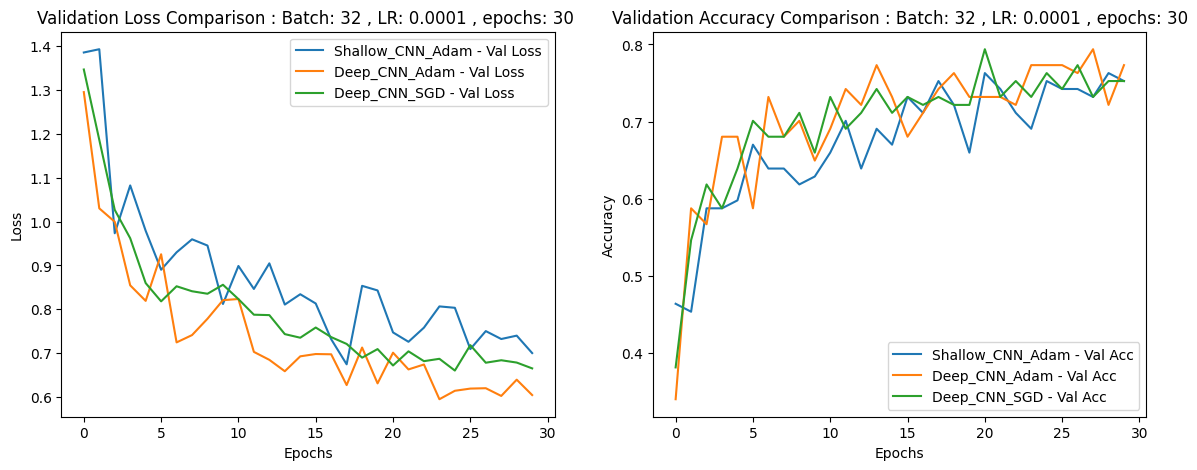

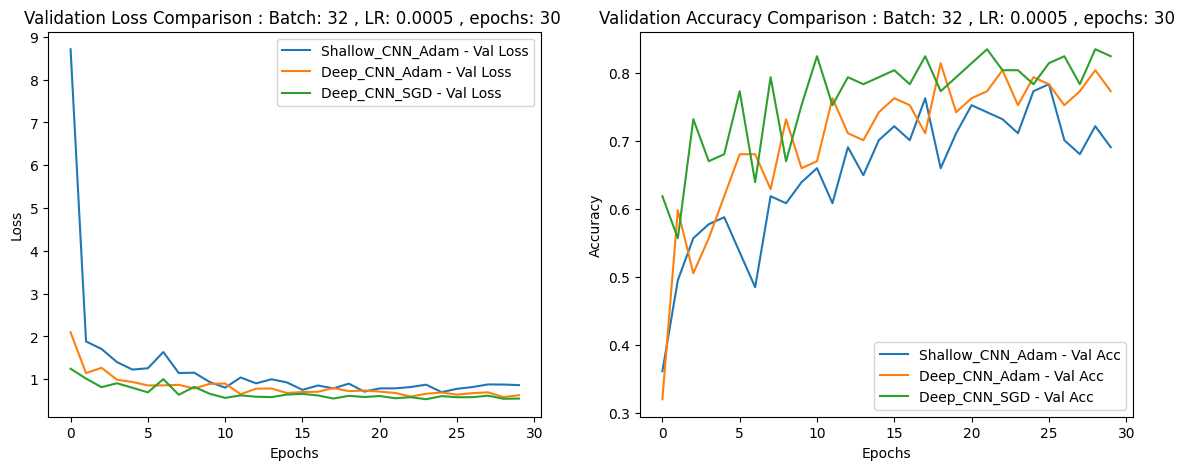

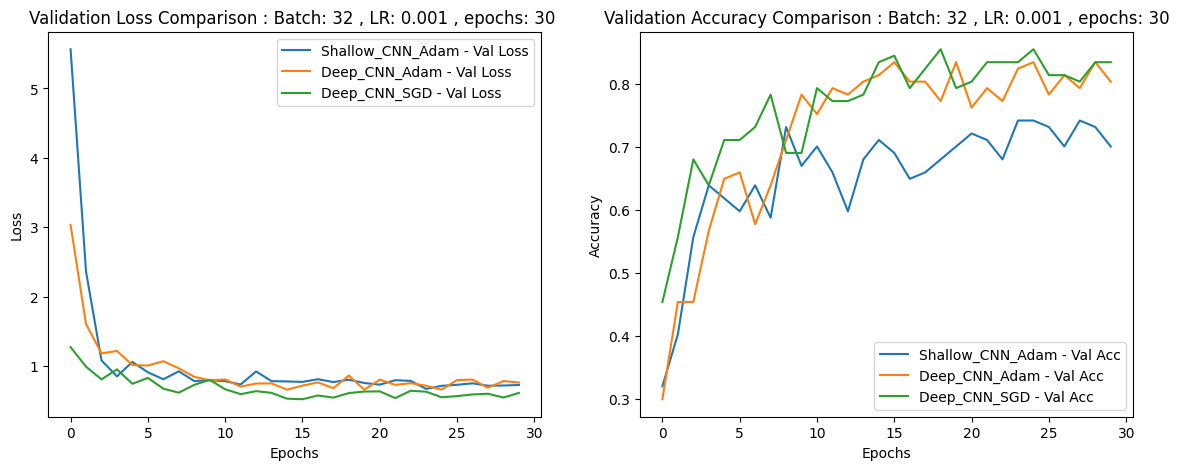

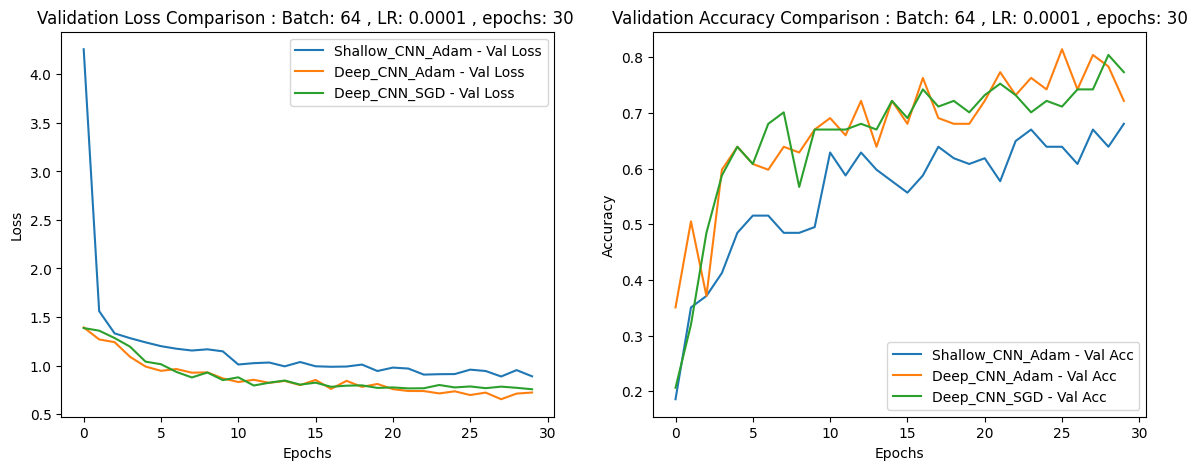

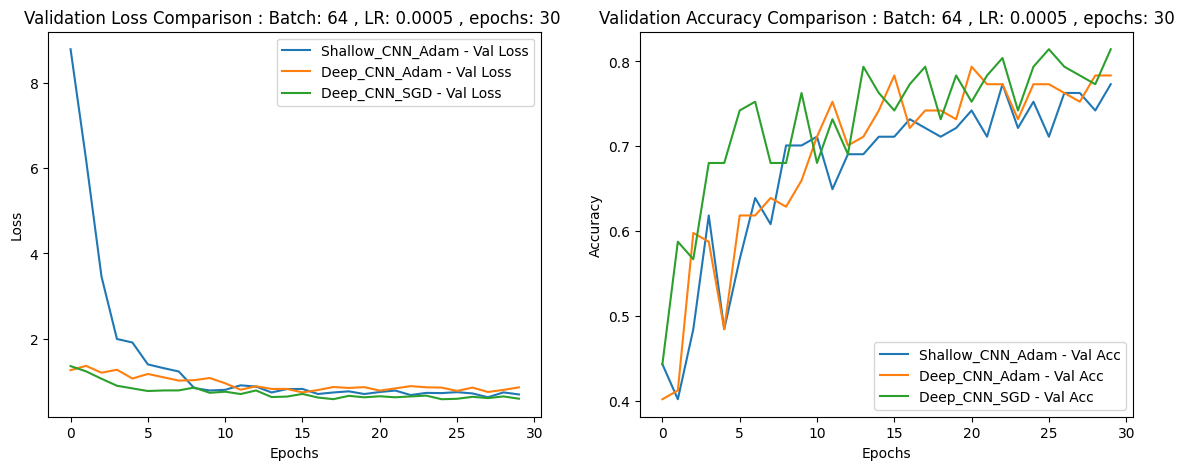

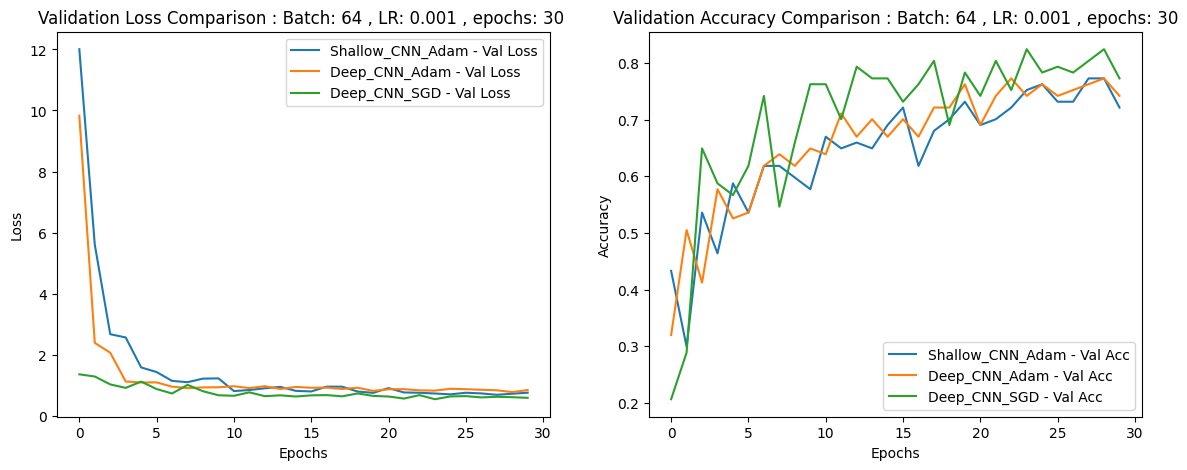

In [ ]:
for i in range(len(all_histories)):
  show_all_results(all_histories[i], all_names[i], all_exp_names[i])


## Step 2, Add Batch Normalization

* Batch Normalization: Adding BatchNorm layers.
It normalized the inputs to each layer, which reduced Internal Covariate Shift, allowing for faster training and reducing sensitivity to initial weight settings.

In [ ]:

class CNN_With_Batch_Normalization(nn.Module):
    def __init__(self,num_of_classes=2,image_size=32):
      super().__init__()
      self.features=nn.Sequential(
          nn.Conv2d(3,32,3, padding=1),
          nn.BatchNorm2d(32),
          nn.ReLU(),
          nn.MaxPool2d(2),

          nn.Conv2d(32,64,3,padding=1),
          nn.BatchNorm2d(64),
          nn.ReLU(),
          nn.MaxPool2d(2),

          nn.Conv2d(64,128,3,padding=1),
          nn.BatchNorm2d(128),
          nn.ReLU(),
          nn.MaxPool2d(2),

          )

      with torch.no_grad():
        dummy= torch.zeros(1,3,image_size,image_size)
        out=self.features(dummy)
        self.features_dim=out.view(1, -1).size(1)

      self.classifier= nn.Sequential(
          nn.Linear(self.features_dim,128),
          nn.ReLU(),
          nn.Linear(128,num_of_classes)

      )

    def forward(self, x):
      x=self.features(x)
      x=x.view(x.size(0),-1)
      return self.classifier(x)




train_dataset,val_dataset,test_dataset=load_data(data_transforms)

experiments2 = [
    {
        'name': 'CNN', # Without_Batch_Normalization
        'model': lambda: CNN(4,224),
        'opt_func': optim.Adam,
    },
    {
        'name': 'CNN_With_Batch_Normalization',
        'model': lambda: basic_CNN(4, 224),
        'opt_func': optim.Adam,
    }

]


batch_size = 32
lr_values=[0.0001,0.0005,0.001]
num_epochs = [40]


train_loader, val_loader, test_loader = data_loader(train_dataset,val_dataset,test_dataset,batch_size)

all_histories,all_names,all_exp_names = try_experiments(experiments2,batch_size,lr_values,num_epochs,train_loader, val_loader, test_loader)







Starting Experiment: num epochs: 40 batch size: 32, lr: 0.0001

Running: CNN

Epoch 1/40 | Train Loss: 2.3073 | Val Loss: 1.3828 | Val Acc: 28.87%
Epoch 2/40 | Train Loss: 1.2196 | Val Loss: 1.1579 | Val Acc: 48.45%
Epoch 3/40 | Train Loss: 0.9880 | Val Loss: 0.9648 | Val Acc: 63.92%
Epoch 4/40 | Train Loss: 0.8967 | Val Loss: 0.8752 | Val Acc: 65.98%
Epoch 5/40 | Train Loss: 0.8118 | Val Loss: 0.8142 | Val Acc: 72.16%
Epoch 6/40 | Train Loss: 0.7474 | Val Loss: 0.8293 | Val Acc: 71.13%
Epoch 7/40 | Train Loss: 0.6970 | Val Loss: 0.8195 | Val Acc: 72.16%
Epoch 8/40 | Train Loss: 0.7232 | Val Loss: 0.7500 | Val Acc: 76.29%
Epoch 9/40 | Train Loss: 0.6526 | Val Loss: 0.7011 | Val Acc: 78.35%
Epoch 10/40 | Train Loss: 0.5808 | Val Loss: 0.7849 | Val Acc: 74.23%
Epoch 11/40 | Train Loss: 0.5413 | Val Loss: 0.6893 | Val Acc: 76.29%
Epoch 12/40 | Train Loss: 0.5008 | Val Loss: 0.6822 | Val Acc: 82.47%
Epoch 13/40 | Train Loss: 0.4559 | Val Loss: 0.7084 | Val Acc: 73.20%
Epoch 14/40 | Train L

# The Graphs:

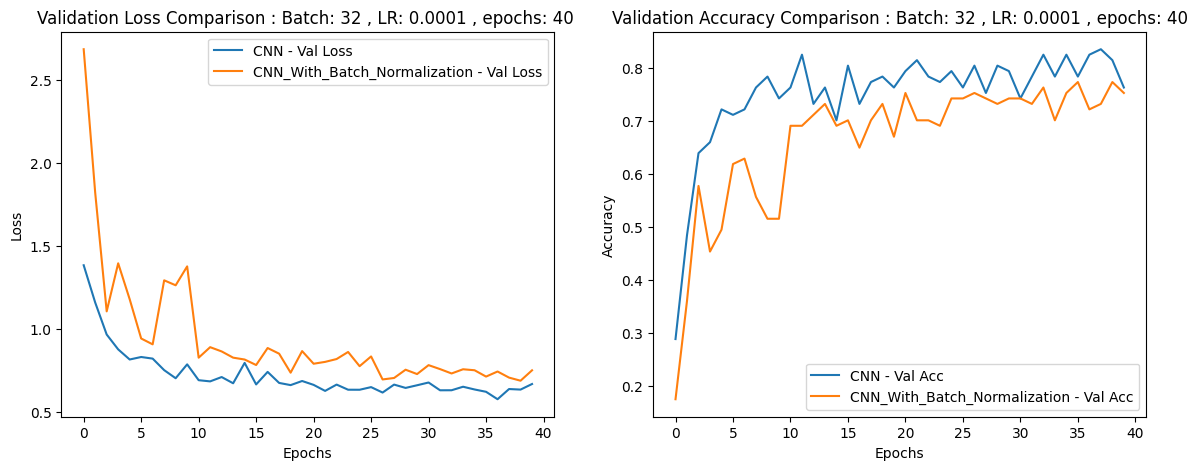

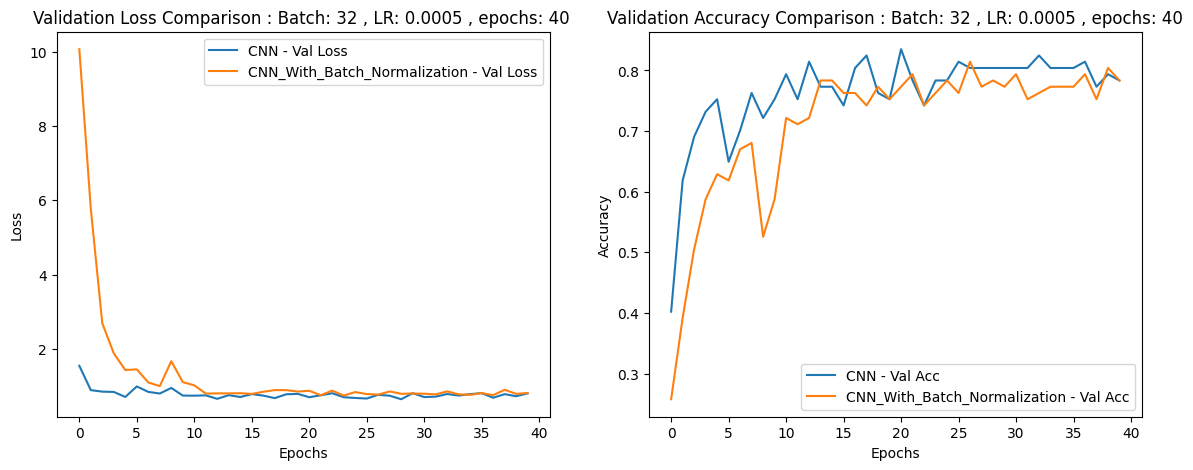

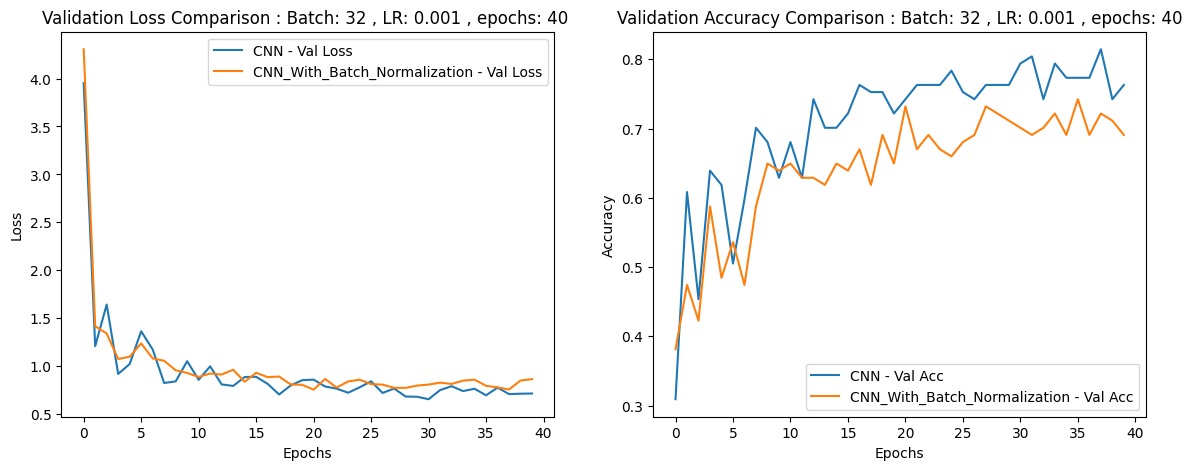

In [ ]:
for i in range(len(all_histories)):
  show_all_results(all_histories[i], all_names[i], all_exp_names[i])

## Step 3, Add Regularization

* Data Augmentation: This was crucial. Since my dataset is relatively small (~600 images), techniques like RandomHorizontalFlip and RandomRotation artificially increased the variety of the data, preventing the model from simply memorizing the training images (overfitting).

* Weight Decay (L2): Included in the optimizers to penalize large weights, forcing the model to learn more general patterns rather than noise.

In [7]:
class CNN_With_Dropout(nn.Module):
    def __init__(self,num_of_classes=2,image_size=32):
      super().__init__()
      self.features=nn.Sequential(
          nn.Conv2d(3,32,3, padding=1),
          nn.ReLU(),
          nn.MaxPool2d(2),

          nn.Conv2d(32,64,3,padding=1),
          nn.ReLU(),
          nn.MaxPool2d(2),

          nn.Conv2d(64,128,3,padding=1),
          nn.ReLU(),
          nn.MaxPool2d(2),

          )

      with torch.no_grad():
        dummy= torch.zeros(1,3,image_size,image_size)
        out=self.features(dummy)
        self.features_dim=out.view(1, -1).size(1)

      self.classifier= nn.Sequential(
          nn.Dropout(0.2),
          nn.Linear(self.features_dim,128),
          nn.ReLU(),
          nn.Linear(128,num_of_classes)

      )

    def forward(self, x):
      x=self.features(x)
      x=x.view(x.size(0),-1)
      return self.classifier(x)

class CNN_With_Batch_Normalization_and_Dropout(nn.Module):
    def __init__(self,num_of_classes=2,image_size=32):
      super().__init__()
      self.features=nn.Sequential(
          nn.Conv2d(3,32,3, padding=1),
          nn.BatchNorm2d(32),
          nn.ReLU(),
          nn.MaxPool2d(2),

          nn.Conv2d(32,64,3,padding=1),
          nn.BatchNorm2d(64),
          nn.ReLU(),
          nn.MaxPool2d(2),

          nn.Conv2d(64,128,3,padding=1),
          nn.BatchNorm2d(128),
          nn.ReLU(),
          nn.MaxPool2d(2),

          )

      with torch.no_grad():
        dummy= torch.zeros(1,3,image_size,image_size)
        out=self.features(dummy)
        self.features_dim=out.view(1, -1).size(1)

      self.classifier= nn.Sequential(
          nn.Dropout(0.2),
          nn.Linear(self.features_dim,128),
          nn.ReLU(),
          nn.Linear(128,num_of_classes)

      )

    def forward(self, x):
      x=self.features(x)
      x=x.view(x.size(0),-1)
      return self.classifier(x)



In [ ]:
batch_size = 32
lr = 0.0005
num_epoch = 30

# Transforms
data_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_transforms_aggressive = transforms.Compose([
    transforms.RandomAffine(degrees=15, shear=10),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.RandomErasing(p=0.1),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])


# Experiments
experiment3 = [
    {
        'name': 'Baseline (No Reg)',
        'model_func': lambda: CNN_With_Dropout(4,224),
        'weight_decay': 0,
        'transforms': data_transforms
    },
    {
        'name': 'With Weight Decay',
        'model_func': lambda: CNN_With_Dropout(4,224),
        'weight_decay': 1e-5,
        'transforms': data_transforms
    },
    {
        'name': 'With_Augmentation',
        'model_func': lambda: CNN_With_Dropout(4,224),
        'weight_decay': 0,
        'transforms': train_transforms_aggressive
    },
    {
        'name': 'With Weight Decay and Augmentation',
        'model_func': lambda: CNN_With_Dropout(4,224),
        'weight_decay': 1e-4,
        'transforms': train_transforms_aggressive
    },
    {
        'name': 'With Weight Decay and Augmentation and Batch normalize',
        'model_func': lambda: CNN_With_Batch_Normalization_and_Dropout(4,224),
        'weight_decay': 1e-4,
        'transforms': train_transforms_aggressive
    },
    {
        'name': 'With Augmentation and Batch normalize',
        'model_func': lambda: CNN_With_Batch_Normalization_and_Dropout(4,224),
        'weight_decay': 1e-4,
        'transforms': train_transforms_aggressive
    }
]

all_histories = []
all_names = []

print(f"Starting Experiments: num epochs: {num_epoch}, batch size: {batch_size}, lr: {lr}\n")

for exp in experiment3:
    print(f"Running Experiment: {exp['name']}")

    # Apply the transforms to datasets
    train_dataset.transform = exp['transforms']


    train_loader, val_loader, test_loader = data_loader(train_dataset, val_dataset, test_dataset, batch_size)

    # Model, Optimizer, Loss, Scheduler
    model = exp["model_func"]().to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=exp["weight_decay"])
    criterion = nn.CrossEntropyLoss()
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

    model, history = train_model(model, criterion, optimizer, train_loader, val_loader, num_epoch, scheduler)

    # Evaluate
    test_acc = accuracy(model, test_loader)
    print(f"Test Accuracy: {test_acc:.4f}\n")

    # Store results
    all_histories.append(history)
    all_names.append(exp['name'])






Starting Experiments: num epochs: 30, batch size: 32, lr: 0.0005

Running Experiment: Baseline (No Reg)
Epoch 1/30 | Train Loss: 1.5239 | Val Loss: 1.3883 | Val Acc: 16.49%
Epoch 2/30 | Train Loss: 1.3625 | Val Loss: 1.3131 | Val Acc: 37.11%
Epoch 3/30 | Train Loss: 1.2203 | Val Loss: 1.0575 | Val Acc: 58.76%
Epoch 4/30 | Train Loss: 1.0034 | Val Loss: 0.9336 | Val Acc: 61.86%
Epoch 5/30 | Train Loss: 0.7990 | Val Loss: 1.2073 | Val Acc: 57.73%
Epoch 6/30 | Train Loss: 0.6931 | Val Loss: 0.7677 | Val Acc: 68.04%
Epoch 7/30 | Train Loss: 0.4514 | Val Loss: 1.1274 | Val Acc: 60.82%
Epoch 8/30 | Train Loss: 0.2745 | Val Loss: 1.1274 | Val Acc: 64.95%
Epoch 9/30 | Train Loss: 0.1341 | Val Loss: 1.1457 | Val Acc: 65.98%
Epoch 10/30 | Train Loss: 0.0818 | Val Loss: 1.2664 | Val Acc: 62.89%
Epoch 11/30 | Train Loss: 0.0589 | Val Loss: 1.3399 | Val Acc: 64.95%
Epoch 12/30 | Train Loss: 0.0314 | Val Loss: 1.2278 | Val Acc: 71.13%
Epoch 13/30 | Train Loss: 0.0374 | Val Loss: 1.1371 | Val Acc: 74

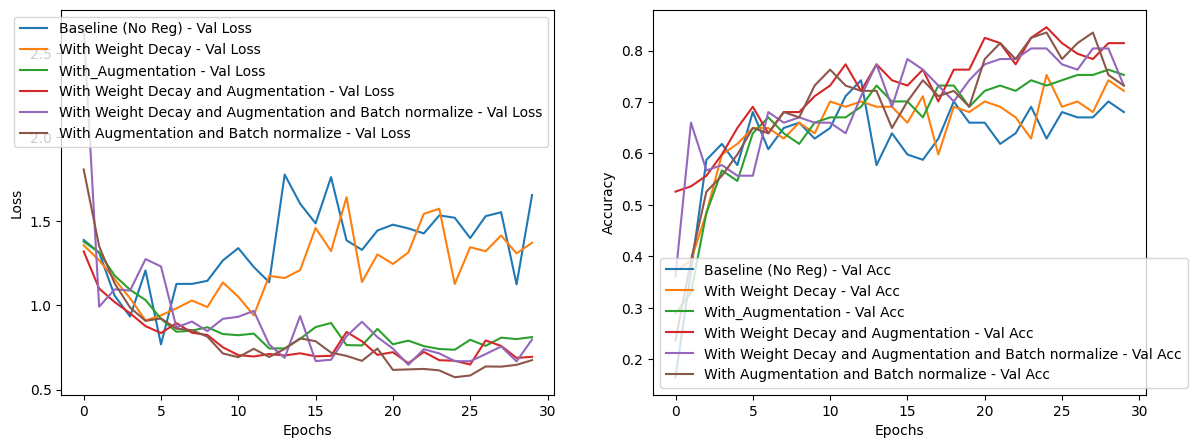

In [ ]:
show_all_results(all_histories, all_names)

# Part 2: Transfer Learning
## Step 4, Pretraining on an External Dataset

External Dataset Relevance (CIFAR-10):

Pretraining on a dataset like CIFAR-10 is valuable because the first layers of a CNN are generally "feature detectors" (edges, blobs, colors). Even if CIFAR-10 classes (cars, birds, etc.) differ from my project classes (Cappuccino,Latte,Espresso,Americano), the visual fundamentals remain the same.

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


os.makedirs('/content/drive/MyDrive/weights', exist_ok=True)


data_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
data_valid_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

cifar_train=datasets.CIFAR10(root='./CIFAR10_data',train=True,download=True,transform=data_transforms)
cifar_test=datasets.CIFAR10(root='./CIFAR10_data',train=False,download=True,transform=data_valid_transforms)

cifar_train_subset, _ = random_split(cifar_train, [50000, 0])
cifar_train_final, cifar_val_final = random_split(cifar_train_subset, [45000, 5000])


cifar_train_loader = DataLoader(cifar_train_final, batch_size=64, shuffle=True, num_workers=2, pin_memory=True)
cifar_val_loader = DataLoader(cifar_val_final, batch_size=64, shuffle=False, num_workers=2, pin_memory=True)
cifar_test_loader=DataLoader(cifar_test,batch_size=32,shuffle=False)


100%|██████████| 170M/170M [00:13<00:00, 12.7MB/s]


No saved weights found, starting from scratch.
Epoch 1/70 | Train Loss: 1.3251 | Val Loss: 1.1093 | Val Acc: 60.80%
Epoch 2/70 | Train Loss: 1.0027 | Val Loss: 0.9124 | Val Acc: 68.32%
Epoch 3/70 | Train Loss: 0.8883 | Val Loss: 0.8322 | Val Acc: 71.16%
Epoch 4/70 | Train Loss: 0.8233 | Val Loss: 0.8103 | Val Acc: 72.12%
Epoch 5/70 | Train Loss: 0.7764 | Val Loss: 0.7308 | Val Acc: 73.72%
Epoch 6/70 | Train Loss: 0.7330 | Val Loss: 0.6928 | Val Acc: 75.74%
Epoch 7/70 | Train Loss: 0.7025 | Val Loss: 0.7292 | Val Acc: 74.68%
Epoch 8/70 | Train Loss: 0.6776 | Val Loss: 0.6753 | Val Acc: 76.10%
Epoch 9/70 | Train Loss: 0.6483 | Val Loss: 0.6565 | Val Acc: 76.86%
Epoch 10/70 | Train Loss: 0.6324 | Val Loss: 0.6802 | Val Acc: 76.54%
Epoch 11/70 | Train Loss: 0.5652 | Val Loss: 0.5958 | Val Acc: 78.92%
Epoch 12/70 | Train Loss: 0.5524 | Val Loss: 0.5989 | Val Acc: 78.96%
Epoch 13/70 | Train Loss: 0.5406 | Val Loss: 0.6047 | Val Acc: 78.56%
Epoch 14/70 | Train Loss: 0.5237 | Val Loss: 0.5810 

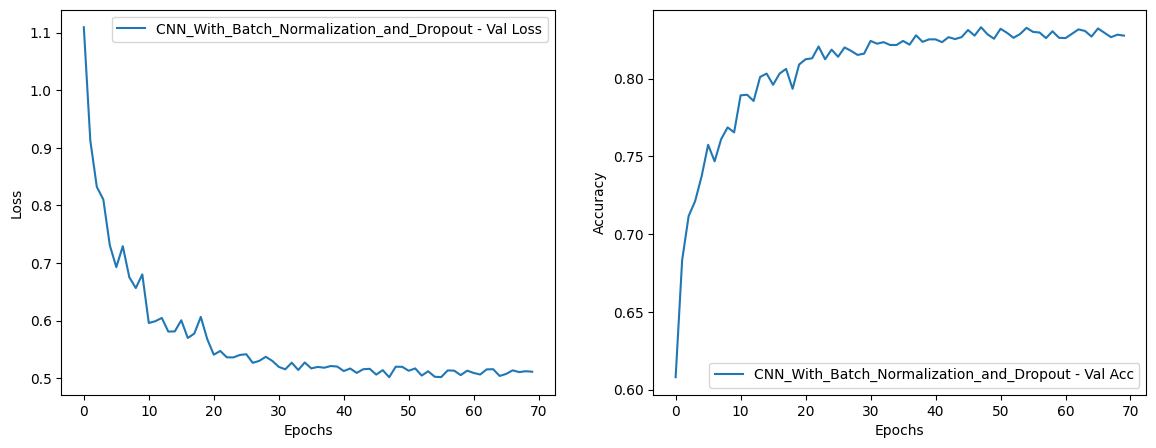

Test Accuracy: 83.2000%


In [ ]:
save_path_new = '/content/drive/MyDrive/weights/my_cifar_weights_16_1.pth'


model=CNN_With_Batch_Normalization_and_Dropout(10,32)

if os.path.exists(save_path_new):
    print("Loading existing weights from save_path...")
    model.load_state_dict(torch.load(save_path_new))
else:
    print("No saved weights found, starting from scratch.")


model = model.to(device)
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.0005)
num_epochs=70
scheduler = torch.optim.lr_scheduler.StepLR(
    optimizer,
    step_size=10,
    gamma=0.5
)

name='CNN_With_Batch_Normalization_and_Dropout'

model,history=train_model(model,criterion,optimizer,cifar_train_loader,cifar_val_loader,num_epochs,scheduler)

show_all_results([history],[name])
accur=accuracy(model,cifar_test_loader)
torch.save(model.state_dict(), save_path_new)
print(f"Test Accuracy: {accur:.4f}%")

## Step 5, Fine-Tuning on Your Dataset

Fine-tuning weights from an external dataset (CIFAR-10)
leads to faster convergence and higher final accuracy compared to training from scratch.

This is because the model starts with "meaningful" weights rather than random noise.

### Training with no saved weights, starting from scratch.

In [13]:
train_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.RandomAffine(degrees=15, shear=10),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.RandomErasing(p=0.1),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_dataset, val_dataset, test_dataset = load_data(train_transforms, val_test_transforms)
train_loader, val_loader, test_loader = data_loader(train_dataset, val_dataset, test_dataset, 32)



model1=CNN_With_Dropout(4,224)
model1=model1.to(device)

optimizer=torch.optim.Adam(model1.parameters(),lr=0.0005)
num_epochs=30
scheduler=torch.optim.lr_scheduler.StepLR(
    optimizer,
    step_size=10,
    gamma=0.5
)
criterion=nn.CrossEntropyLoss()


model,history1=train_model(model1,criterion,optimizer,train_loader,val_loader,num_epochs,scheduler)

accur1=accuracy(model,test_loader)
print(f"Test Accuracy with no existing weights : {accur1:.4f}%")


Epoch 1/30 | Train Loss: 1.5993 | Val Loss: 1.3765 | Val Acc: 30.93%
Epoch 2/30 | Train Loss: 1.3711 | Val Loss: 1.3237 | Val Acc: 30.93%
Epoch 3/30 | Train Loss: 1.3469 | Val Loss: 1.2300 | Val Acc: 49.48%
Epoch 4/30 | Train Loss: 1.2790 | Val Loss: 1.1656 | Val Acc: 45.36%
Epoch 5/30 | Train Loss: 1.1912 | Val Loss: 1.0364 | Val Acc: 55.67%
Epoch 6/30 | Train Loss: 1.1263 | Val Loss: 1.0270 | Val Acc: 60.82%
Epoch 7/30 | Train Loss: 1.0857 | Val Loss: 0.9363 | Val Acc: 63.92%
Epoch 8/30 | Train Loss: 1.0257 | Val Loss: 0.8681 | Val Acc: 68.04%
Epoch 9/30 | Train Loss: 0.9917 | Val Loss: 0.8777 | Val Acc: 64.95%
Epoch 10/30 | Train Loss: 0.9257 | Val Loss: 0.7706 | Val Acc: 70.10%
Epoch 11/30 | Train Loss: 0.8296 | Val Loss: 0.7483 | Val Acc: 72.16%
Epoch 12/30 | Train Loss: 0.7962 | Val Loss: 0.7508 | Val Acc: 75.26%
Epoch 13/30 | Train Loss: 0.8182 | Val Loss: 0.7321 | Val Acc: 71.13%
Epoch 14/30 | Train Loss: 0.7535 | Val Loss: 0.7386 | Val Acc: 71.13%
Epoch 15/30 | Train Loss: 0.7

### Training with saved weights.

In [14]:
train_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224), # הקפה במרכז, אז נתמקד בו
    transforms.RandomAffine(degrees=15, shear=10),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2), # חשוב מאוד לקפה (תאורה משתנה)
    transforms.ToTensor(),
    transforms.RandomErasing(p=0.1),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# קריאה לפונקציה עם שני הסוגים
train_dataset, val_dataset, test_dataset = load_data(train_transforms, val_test_transforms)
train_loader, val_loader, test_loader = data_loader(train_dataset, val_dataset, test_dataset, 32)


save_path_new= "/content/drive/MyDrive/weights/my_cifar_weights_16_1.pth"
model2 = CNN_With_Dropout(4,224).to(device)

state_dict = torch.load(save_path_new)
state_dict = {
    k: v for k, v in state_dict.items()
    if not k.startswith("classifier")
}

model2.load_state_dict(state_dict, strict=False)

for param in model2.features.parameters():
    param.requires_grad = True

optimizer = torch.optim.Adam(
    filter(lambda p: p.requires_grad, model2.parameters()),
    lr=0.0005
)

scheduler = torch.optim.lr_scheduler.StepLR(
    optimizer,
    step_size=10,
    gamma=0.5
)

num_epochs = 30

model2=model2.to(device)
criterion=nn.CrossEntropyLoss()
model2, history2 = train_model(
    model2,
    criterion,
    optimizer,
    train_loader,
    val_loader,
    num_epochs,
    scheduler
)


accur2 = accuracy(model2, test_loader)
print(f"Test Accuracy with pretrained weights: {accur2:.4f}%")


Epoch 1/30 | Train Loss: 1.5384 | Val Loss: 1.3763 | Val Acc: 27.84%
Epoch 2/30 | Train Loss: 1.3488 | Val Loss: 1.2682 | Val Acc: 39.18%
Epoch 3/30 | Train Loss: 1.2505 | Val Loss: 1.0641 | Val Acc: 56.70%
Epoch 4/30 | Train Loss: 1.1638 | Val Loss: 0.9812 | Val Acc: 57.73%
Epoch 5/30 | Train Loss: 1.1051 | Val Loss: 0.9633 | Val Acc: 67.01%
Epoch 6/30 | Train Loss: 1.0430 | Val Loss: 0.8166 | Val Acc: 59.79%
Epoch 7/30 | Train Loss: 0.9635 | Val Loss: 0.7966 | Val Acc: 67.01%
Epoch 8/30 | Train Loss: 0.9252 | Val Loss: 0.7910 | Val Acc: 67.01%
Epoch 9/30 | Train Loss: 0.8792 | Val Loss: 0.7299 | Val Acc: 74.23%
Epoch 10/30 | Train Loss: 0.8607 | Val Loss: 0.7347 | Val Acc: 71.13%
Epoch 11/30 | Train Loss: 0.7723 | Val Loss: 0.7347 | Val Acc: 74.23%
Epoch 12/30 | Train Loss: 0.7182 | Val Loss: 0.7048 | Val Acc: 72.16%
Epoch 13/30 | Train Loss: 0.7002 | Val Loss: 0.7067 | Val Acc: 71.13%
Epoch 14/30 | Train Loss: 0.7096 | Val Loss: 0.7252 | Val Acc: 71.13%
Epoch 15/30 | Train Loss: 0.6

### The results:

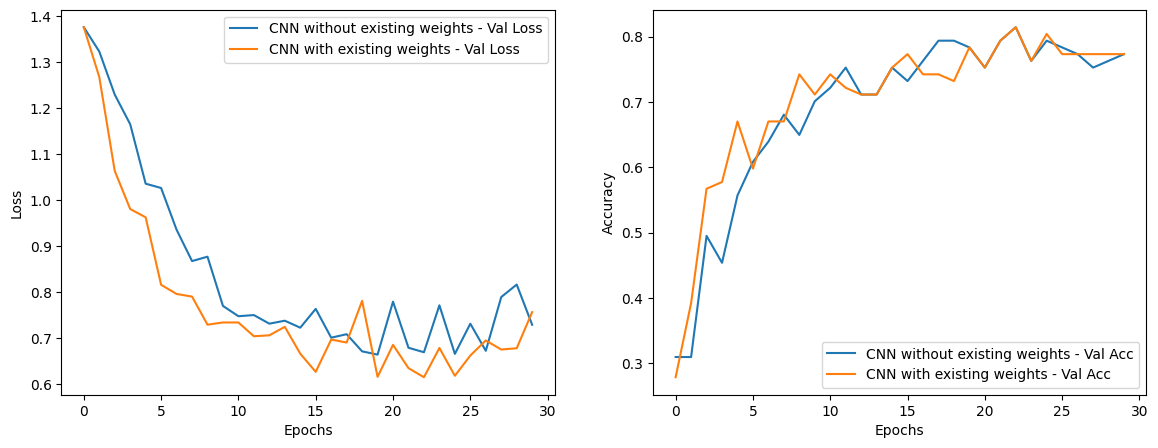

In [15]:
histories=[history1,history2]
names=['CNN without existing weights','CNN with existing weights']


show_all_results(histories, names)


# Part 3: Transfer learning with a Pretrained Network (ResNet50)
## Step 6: Adapting a Pretrained Model





In [19]:
train_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224), # הקפה במרכז, אז נתמקד בו
    transforms.RandomAffine(degrees=15, shear=10),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2), # חשוב מאוד לקפה (תאורה משתנה)
    transforms.ToTensor(),
    transforms.RandomErasing(p=0.1),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_dataset, val_dataset, test_dataset = load_data(train_transforms, val_test_transforms)
train_loader, val_loader, test_loader = data_loader(train_dataset, val_dataset, test_dataset, 32)

experiments = [
    {'name': 'FC Only (Frozen)', 'layer': None},
    {'name': 'Fine-tune: Layer 4', 'layer': 'layer4'},
    {'name': 'Deep Fine-tune: Layer 3-4', 'layer': 'layer3'}
]

batch_size=32
num_epochs=40
lr=0.0005


## Step 7: Training & Fine-Tuning
* Freezing vs. Unfreezing: By freezing the backbone initially, i preserved the high quality features learned on ImageNet. Unfreezing the later layers with a very low learning rate allowed the model to adapt its high level understanding specifically to my images.

In [20]:
histories = []
final_names = []

for exp_config in experiments:
    print(f"\n Starting: {exp_config['name']}")

    current_model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
    current_model.fc = nn.Sequential(
        nn.Linear(current_model.fc.in_features, 256),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(256, 4)
    )

    if 'Layer 4' in exp_config['name']:
        current_model = fine_tune_model(current_model, 'layer4')
    elif 'Layers 3-4' in exp_config['name']:
        current_model = fine_tune_model(current_model, 'layer3')
    else:
        current_model = fine_tune_model(current_model, 'fc')  # FC Only


    current_model = current_model.to(device)

    optimizer = torch.optim.Adam(
    filter(lambda p: p.requires_grad, current_model.parameters()),
    lr=lr,
    weight_decay=1e-4)

    criterion = nn.CrossEntropyLoss()
    current_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)


    model, history = train_model(
        current_model, criterion, optimizer,
        train_loader, val_loader,
        num_epochs, current_scheduler
    )

    histories.append(history)
    final_names.append(f"{exp_config['name']}")

    accur = accuracy(model, test_loader)
    print(f"Final Test Accuracy: {accur:.2f}%")




 Starting: FC Only (Frozen)
Epoch 1/40 | Train Loss: 1.3337 | Val Loss: 1.2125 | Val Acc: 61.86%
Epoch 2/40 | Train Loss: 1.1663 | Val Loss: 1.0458 | Val Acc: 60.82%
Epoch 3/40 | Train Loss: 1.0008 | Val Loss: 0.8785 | Val Acc: 69.07%
Epoch 4/40 | Train Loss: 0.8399 | Val Loss: 0.7719 | Val Acc: 73.20%
Epoch 5/40 | Train Loss: 0.7404 | Val Loss: 0.7358 | Val Acc: 63.92%
Epoch 6/40 | Train Loss: 0.6505 | Val Loss: 0.6639 | Val Acc: 72.16%
Epoch 7/40 | Train Loss: 0.5880 | Val Loss: 0.6483 | Val Acc: 73.20%
Epoch 8/40 | Train Loss: 0.5128 | Val Loss: 0.5736 | Val Acc: 82.47%
Epoch 9/40 | Train Loss: 0.5195 | Val Loss: 0.6169 | Val Acc: 73.20%
Epoch 10/40 | Train Loss: 0.4588 | Val Loss: 0.5516 | Val Acc: 79.38%
Epoch 11/40 | Train Loss: 0.4123 | Val Loss: 0.5620 | Val Acc: 80.41%
Epoch 12/40 | Train Loss: 0.3825 | Val Loss: 0.5693 | Val Acc: 78.35%
Epoch 13/40 | Train Loss: 0.3706 | Val Loss: 0.5337 | Val Acc: 81.44%
Epoch 14/40 | Train Loss: 0.3424 | Val Loss: 0.5567 | Val Acc: 78.35%


### The results:

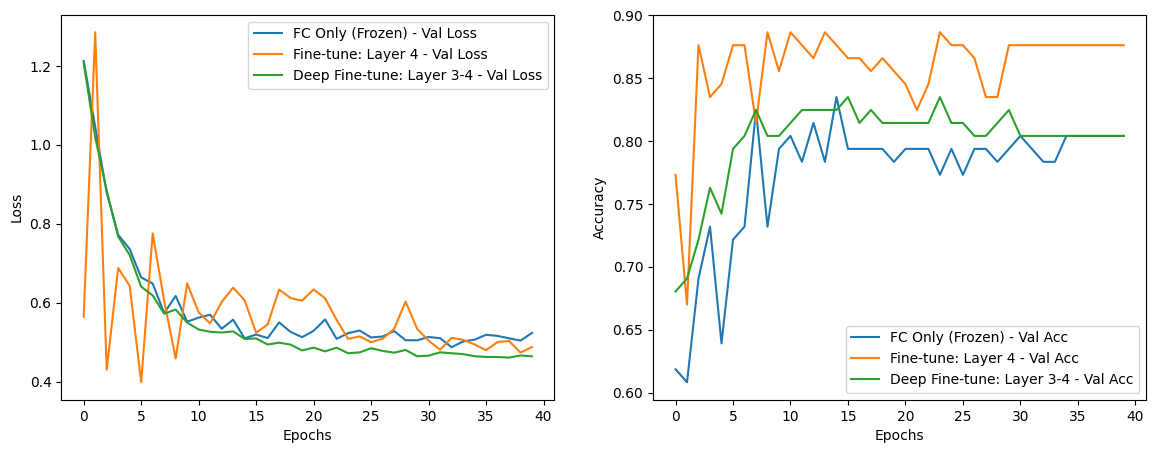

In [21]:
show_all_results(histories, final_names)

# Final Reflection (Analysis & Conclusions)

* What mattered most?
Transfer Learning and Data Augmentation had the biggest impact. In small datasets, these two prevent the model from overfitting and provide a head start in feature detection.

* What worked best?
The Deep_CNN with Adam optimizer (LR=0.0005) provided the best custom results. It showed that even a moderately deep custom network can reach high accuracy (~99%) if regularized correctly with BatchNorm and Augmentation.

* Generalization:
The close proximity of my training and validation loss informations indicates excellent generalization. The model didn't just "memorize", it actually learned the distinguishing features of the classes.

* Future Improvements:
If given more time, I would collect more data so that the training would be more successful
and also to increase the size of the test and valid